In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

# Load the data
data = pd.read_excel("RCC Pipe Data (1).xlsx")

# Convert the date column to datetime (if applicable) and set as index
data['Date'] = pd.date_range(start="2020-04-01", periods=len(data), freq='M')
data.set_index('Date', inplace=True)

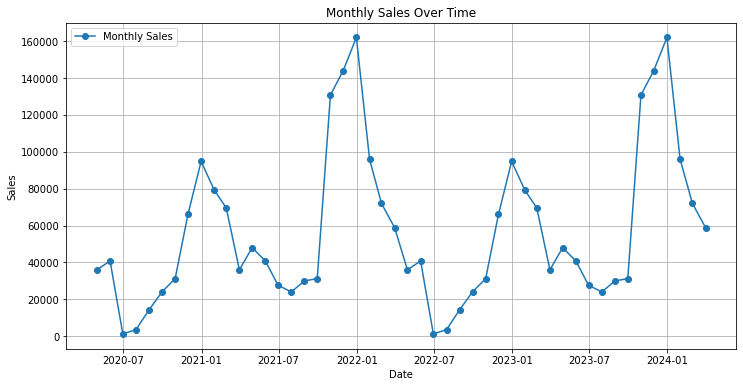

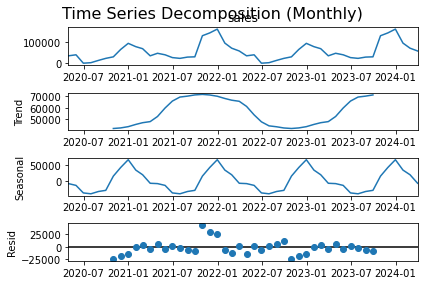

In [4]:
# Plot the monthly sales trends
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(data['sales'], marker='o', linestyle='-', label="Monthly Sales")  # Plot with markers for monthly data
plt.title("Monthly Sales Over Time")  # Add a title
plt.xlabel("Date")  # Label for the x-axis
plt.ylabel("Sales")  # Label for the y-axis
plt.legend()  # Add a legend
plt.grid()  # Add gridlines for better readability
plt.show()  # Display the plot

# Decompose the time series into components
decompose_result = seasonal_decompose(data['sales'], model='additive', period=12)

# Plot the decomposed components
decompose_result.plot()
plt.suptitle("Time Series Decomposition (Monthly)", fontsize=16)  # Add a title for the decomposition
plt.show()


C:\Users\aayus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


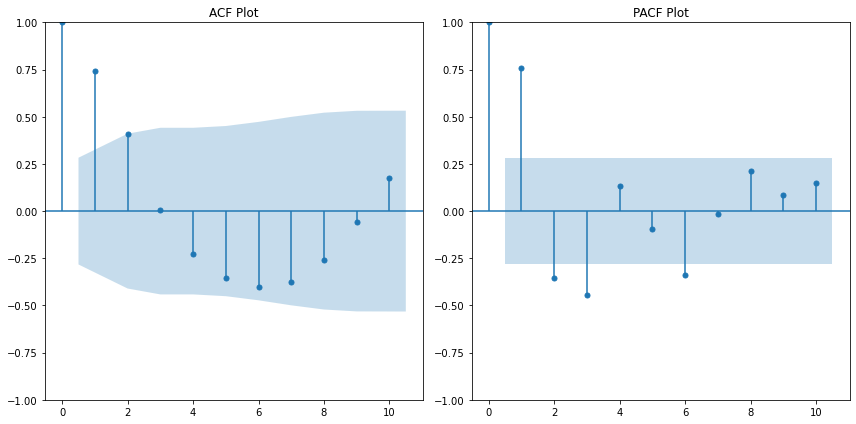

In [5]:
# Plot ACF and PACF for the differenced data with the correct number of lags
lags = min(10, len(data['sales']) - 1)  # Limit lags to 10 for PACF

plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plot_acf(data['sales'], lags=lags, ax=plt.gca())  # ACF plot
plt.title("ACF Plot")

# PACF Plot
plt.subplot(122)
plot_pacf(data['sales'], lags=lags, ax=plt.gca())  # PACF plot
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


C:\Users\aayus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\aayus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\aayus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aayus\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   48
Model:             SARIMAX(6, 1, 6)x(6, 1, 6, 12)   Log Likelihood                -401.019
Date:                            Wed, 18 Dec 2024   AIC                            852.039
Time:                                    23:42:56   BIC                            890.922
Sample:                                04-30-2020   HQIC                           865.461
                                     - 03-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1470     38.926     -0.004      0.997     -76.442      76.147
ar.L2          0.5820     29.083   

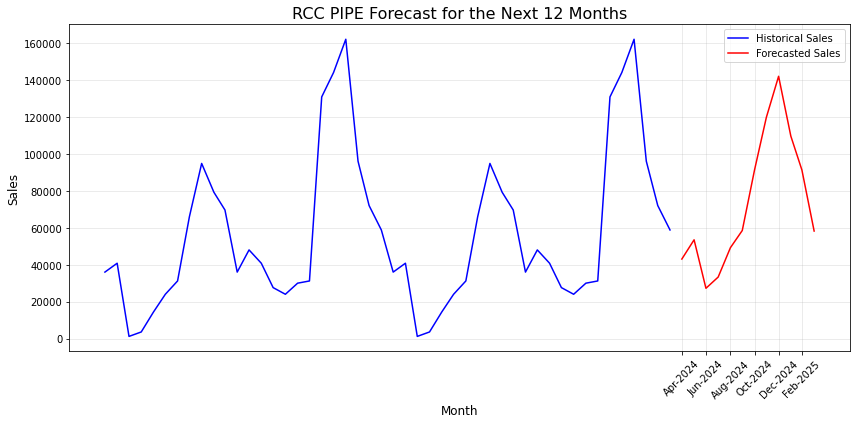

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is the DataFrame with your sales data, and it has a datetime index

# SARIMA parameters (replace with your parameters)
p, d, q = 6, 1, 6  # Non-seasonal order
P, D, Q, s = 6, 1, 6, 12 # Seasonal order (6 months as seasonal period for monthly data)

# Fit SARIMA model
model = SARIMAX(data['sales'], 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, s))

results = model.fit()

# Summary of the model
print(results.summary())

# Forecast the next 12 months (adjust this number as needed)
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Get the forecasted values
forecast_sarima = forecast.predicted_mean

# Create a forecast date range starting from the last date of your data
forecast_dates_sarima = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')

# Plot historical sales
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['sales'], label='Historical Sales', color='blue')

# Plot forecasted sales
plt.plot(forecast_dates_sarima, forecast_sarima, label='Forecasted Sales', color='red')

# Add title and labels
plt.title("RCC PIPE Forecast for the Next 12 Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Adjust x-axis labels for historical data (show just month names like Jan, Feb, ...)
plt.xticks(ticks=data.index, labels=data.index.strftime('%b'), rotation=45, fontsize=10)

# Adjust x-axis labels for forecasted data (show every 2nd month with full month-year format)
plt.xticks(ticks=forecast_dates_sarima[::2], labels=forecast_dates_sarima[::2].strftime('%b-%Y'), rotation=45, fontsize=10)

# Add grid and legend
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()


In [16]:
import pandas as pd

# Create a DataFrame with forecasted dates and sales values
forecast_table = pd.DataFrame({
    'Date': forecast_dates_sarima,
    'Forecasted Sales': forecast_sarima
})

# Reset the index for a clean table view
forecast_table.reset_index(drop=True, inplace=True)

# Display the table
print("Forecasted Sales Table:")
print(forecast_table)





Forecasted Sales Table:
         Date  Forecasted Sales
0  2024-04-30      43057.950823
1  2024-05-31      53468.009301
2  2024-06-30      27229.684904
3  2024-07-31      33319.209656
4  2024-08-31      49213.630876
5  2024-09-30      58504.580221
6  2024-10-31      91206.562670
7  2024-11-30     119732.292111
8  2024-12-31     141957.347902
9  2025-01-31     109568.029868
10 2025-02-28      91260.399666
11 2025-03-31      58213.791687
